# Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Importing data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nanditapore/healthcare-diabetes")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/healthcare-diabetes


In [4]:
# Importing dataset, removing ID column
df = pd.read_csv('/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv', index_col=0)

# Data Pre-processing and Exploratory Data Analysis (EDA)

In [5]:
# Checking the first 10 rows 
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Id                                                                      
1             6      148             72             35        0  33.6   
2             1       85             66             29        0  26.6   
3             8      183             64              0        0  23.3   
4             1       89             66             23       94  28.1   
5             0      137             40             35      168  43.1   
6             5      116             74              0        0  25.6   
7             3       78             50             32       88  31.0   
8            10      115              0              0        0  35.3   
9             2      197             70             45      543  30.5   
10            8      125             96              0        0   0.0   

    DiabetesPedigreeFunction  Age  Outcome  
Id                                          
1                      0.627   50        1  
2                      0.351   31        0  
3                      0.672   32        1  
4                      0.167   21        0  
5                      2.288   33        1  
6                      0.201   30        0  
7                      0.248   26        1  
8                      0.134   29        0  
9                      0.158   53        1  
10                     0.232   54        1

Outcome 0 = have diabetes

Outcome 1 = dont have diabetes

In [6]:
# Display the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 1 to 2768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 216.2 KB
None


In [7]:
df.shape

(2768, 9)

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Data Preprocessing # 
preparing data for analysis and modelling

1. Removing duplicates

In [9]:
# Check for missing (NaN) values in the dataset
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# Checking if we had duplicates
print(df.duplicated().sum())

1990


In [11]:
# Removing duplicates
#df = df.drop_duplicates()

# Print the result
print(df.shape)

(2768, 9)


After removing Id from the dataset, the number of distinct rows drops from 2768 to 788. It is definitely not common for different patients to have the same values of that many factors. It is very likely that mistakes were made while inputing the data. Next we shall eliminate all duplicate values.

2.	Handling Missing Data

In [12]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

3.	Handling Noisy Data

In [13]:
# Define the relevant ranges for each feature
ranges = {
    'Pregnancies': (0, 12),
    'Glucose': (70, 199),
    'BloodPressure': (60, 122),
    'SkinThickness': (10, 50),
    'BMI': (15, 60),
    'DiabetesPedigreeFunction': (0, 2),
    'Age': (21, 81)
}

# Replace out-of-range values with the mean of the column
for column, (min_val, max_val) in ranges.items():
    # Calculate the mean of the column
    column_mean = df[column].mean()
    
    # Replace values below the minimum or above the maximum with the mean
    df[column] = df[column].apply(lambda x: column_mean if x < min_val or x > max_val else x)

# Print the cleaned data size
print(f"Cleaned Data Size: {df.shape}")

Cleaned Data Size: (2768, 9)


4. Feature scaling

In [14]:
# Feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(df.drop('Outcome', axis=1))

In [15]:
# Convert scaled data back to DataFrame
scaled_dataset = pd.DataFrame(scaled_dataset, columns=df.columns[:-1]) 
scaled_dataset['Outcome'] = df['Outcome']

# Data Visualisation
Visualising data to uncover patterns and insights

In [16]:
print(df.describe())

       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.571045   122.712336      74.110883      26.390999    80.127890   
std       3.048509    29.638641       9.693449       8.686215   112.301933   
min       0.000000    71.000000      60.000000      10.000000     0.000000   
25%       1.000000   100.000000      68.000000      20.824422     0.000000   
50%       3.000000   119.000000      72.000000      23.000000    37.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      12.000000   199.000000     122.000000      50.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2768.000000               2768.000000  2768.000000  2768.000000  
mean     32.481343                  0.463299    33.132225     0.343931  
std       6.806709                  0.302591    11.777230     0.475104  
min  

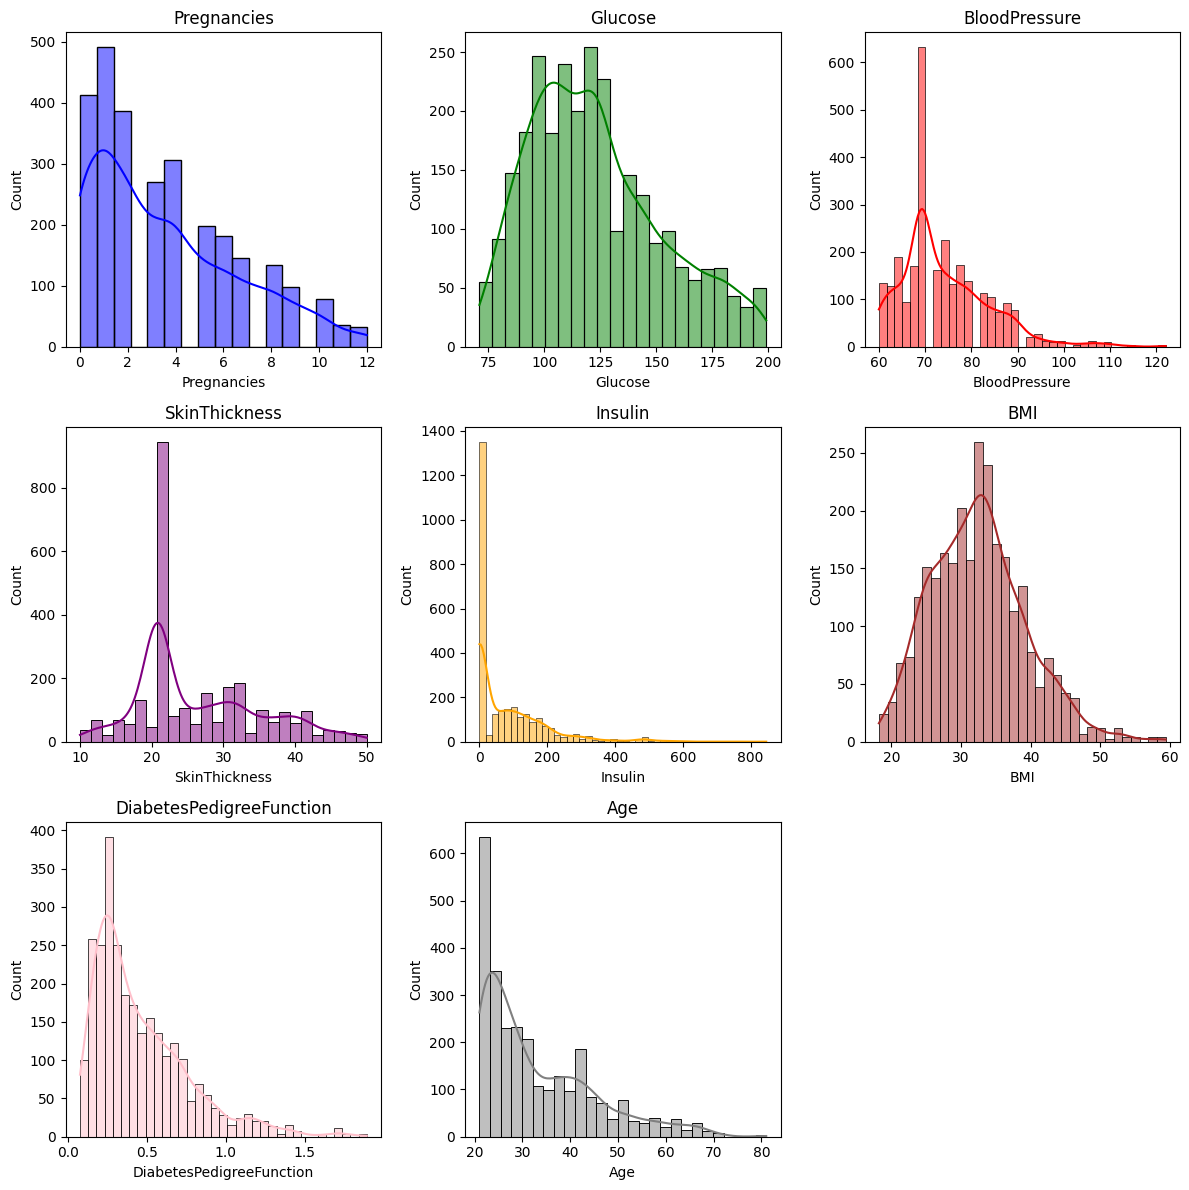

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to plot
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Define a list of colors for each plot
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

# Set up the figure size
plt.figure(figsize=(12, 12))

# Loop through the columns and create histograms
for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)  # Creating a 3x3 subplot grid
    sns.histplot(data=df, x=col, kde=True, color=colors[i])  # Histogram with KDE curve and custom color
    plt.title(col)  # Add a title for each plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

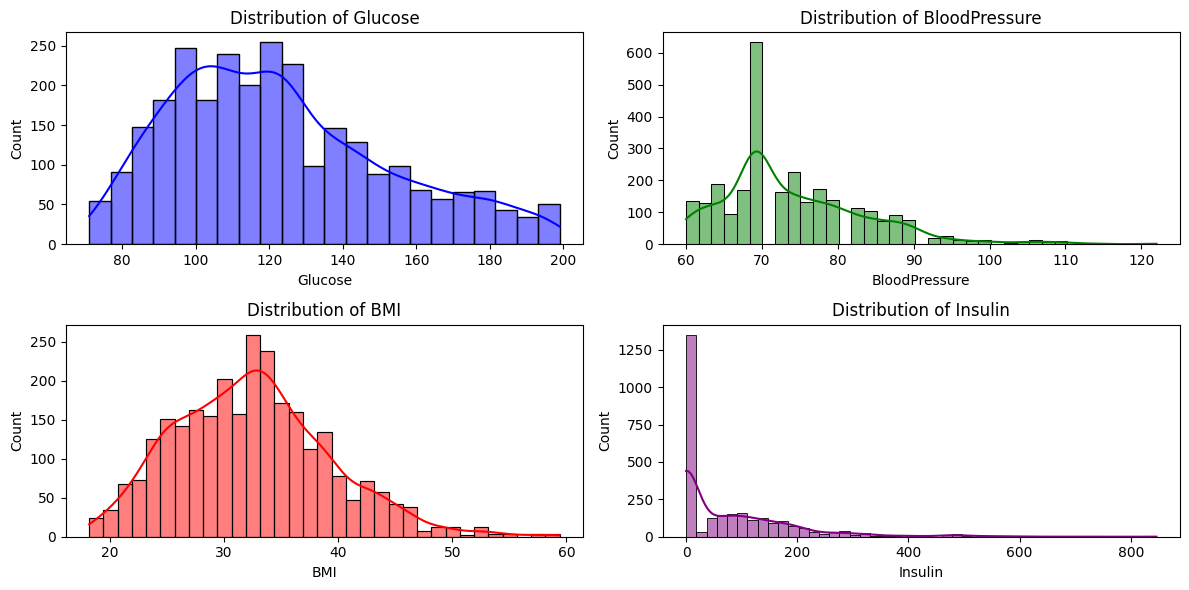

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='blue')
plt.title('Distribution of Glucose')

plt.subplot(2, 2, 2)
sns.histplot(df['BloodPressure'], kde=True, color='green')
plt.title('Distribution of BloodPressure')

plt.subplot(2, 2, 3)
sns.histplot(df['BMI'], kde=True, color='red')
plt.title('Distribution of BMI')

plt.subplot(2, 2, 4)
sns.histplot(df['Insulin'], kde=True, color='purple')
plt.title('Distribution of Insulin')

plt.tight_layout()
plt.show()

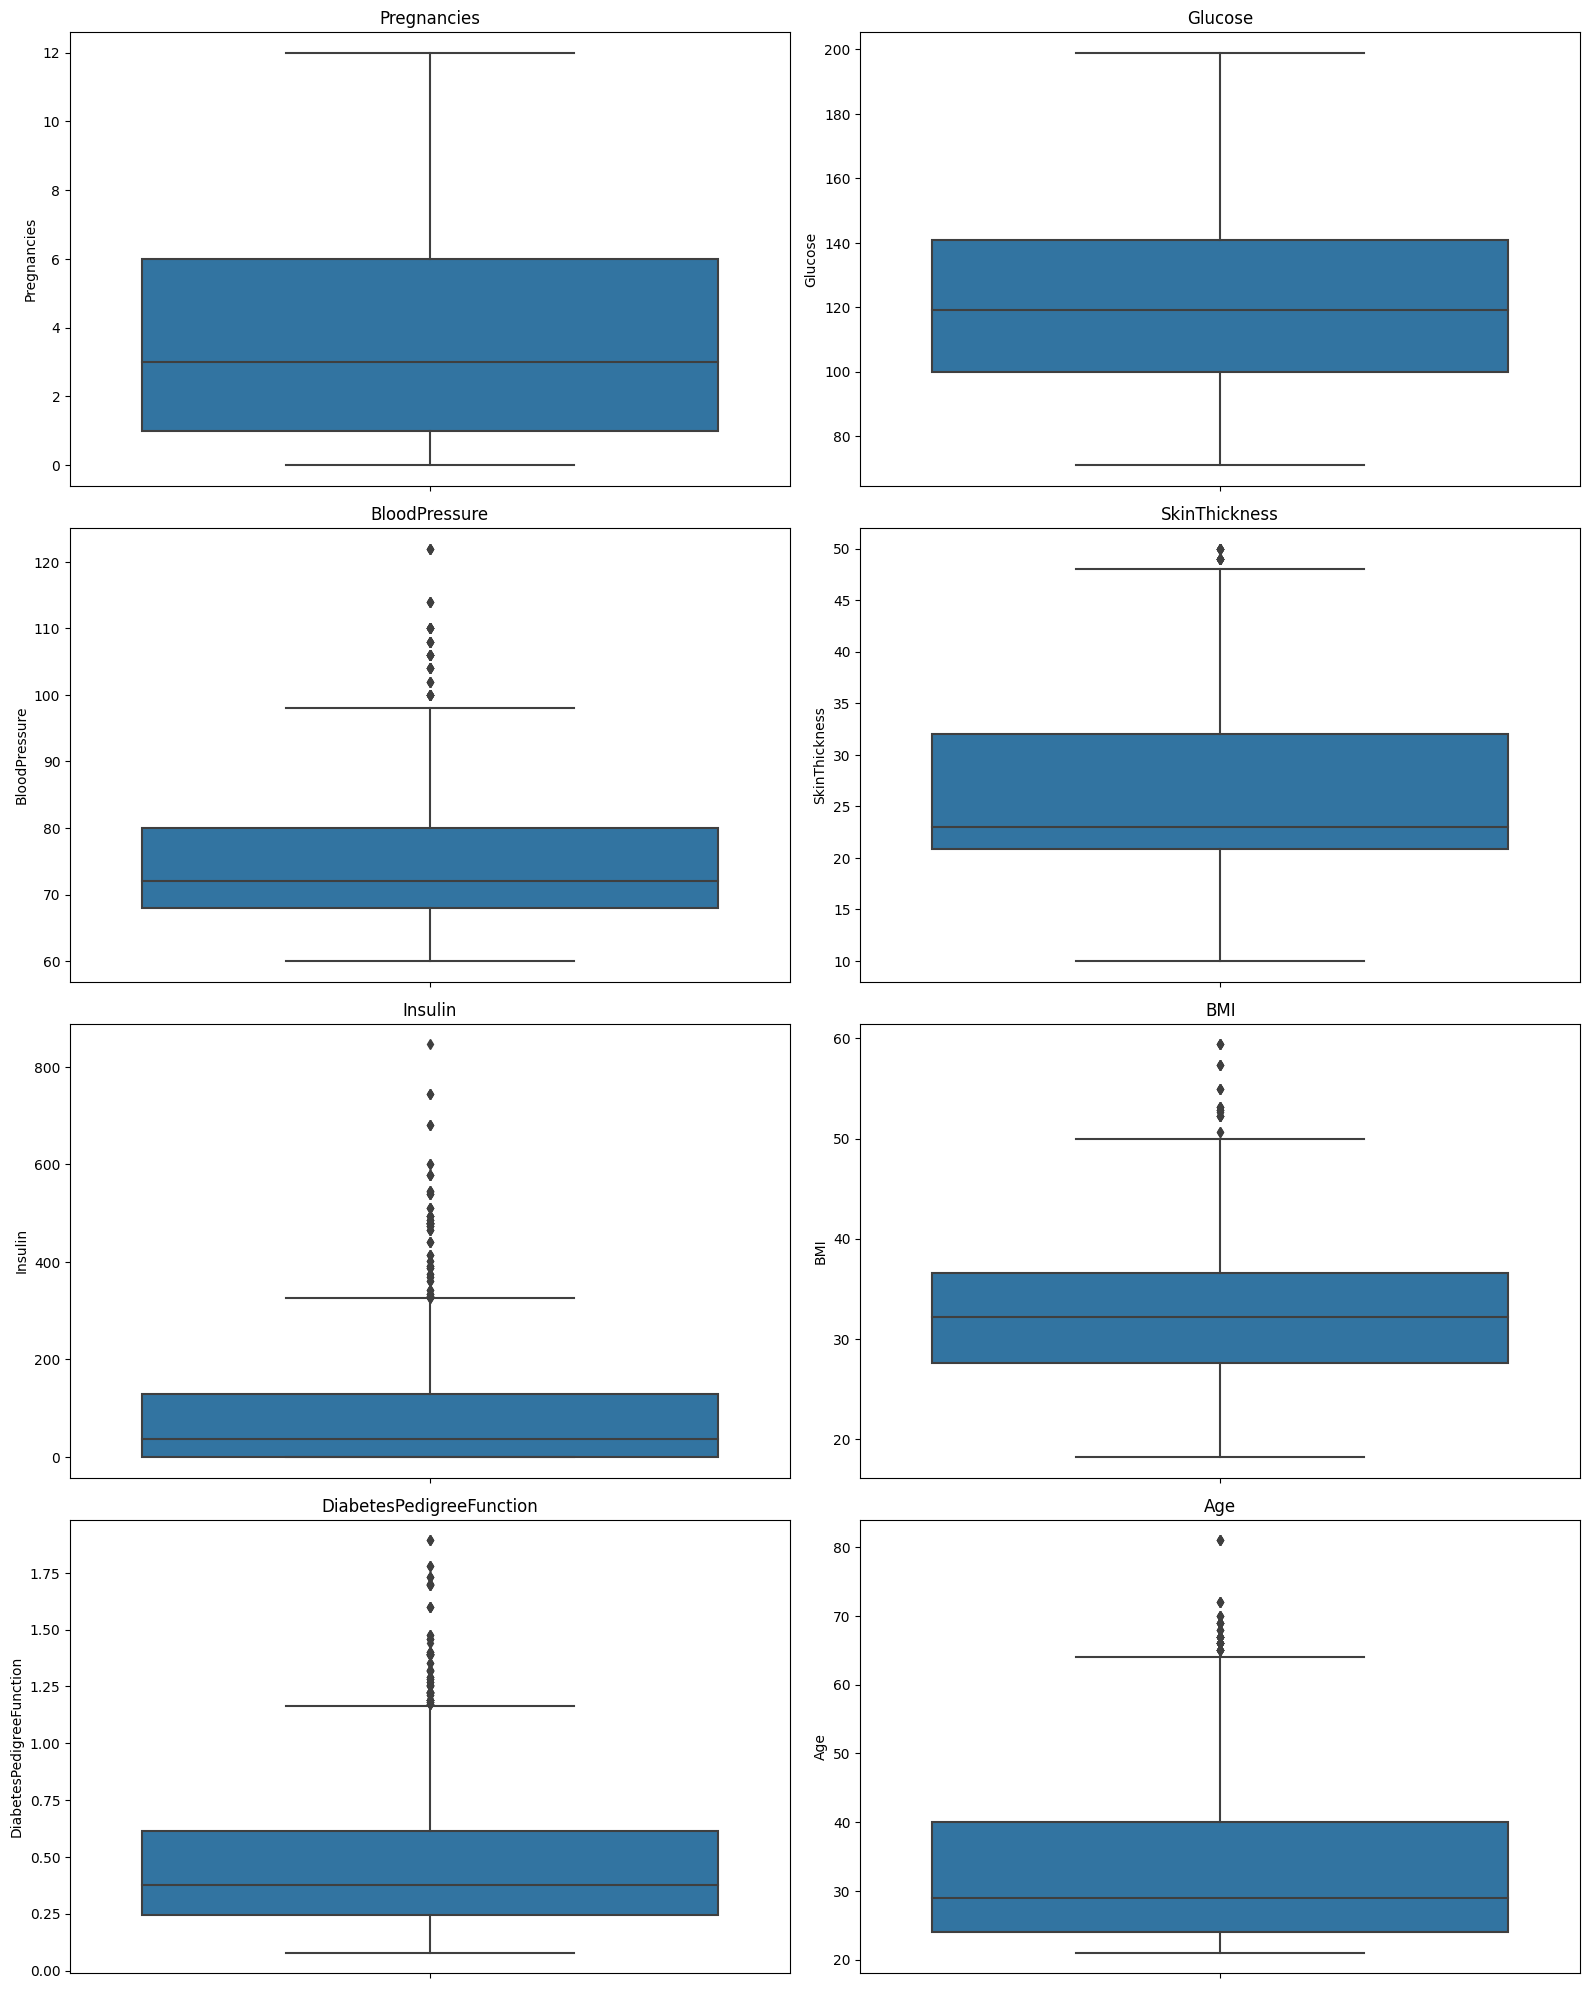

In [19]:
# List of numeric columns to plot
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the figure size
plt.figure(figsize=(16, 20))  # Increase figure size to accommodate more subplots

# Loop through the columns and create boxplots
for i, col in enumerate(columns):
    plt.subplot(len(columns) // 2 + len(columns) % 2, 2, i+1)  # Create subplots in 2 columns
    sns.boxplot(data=df, y=col)  # Create boxplot for each column
    plt.title(col)  # Add a title for each plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

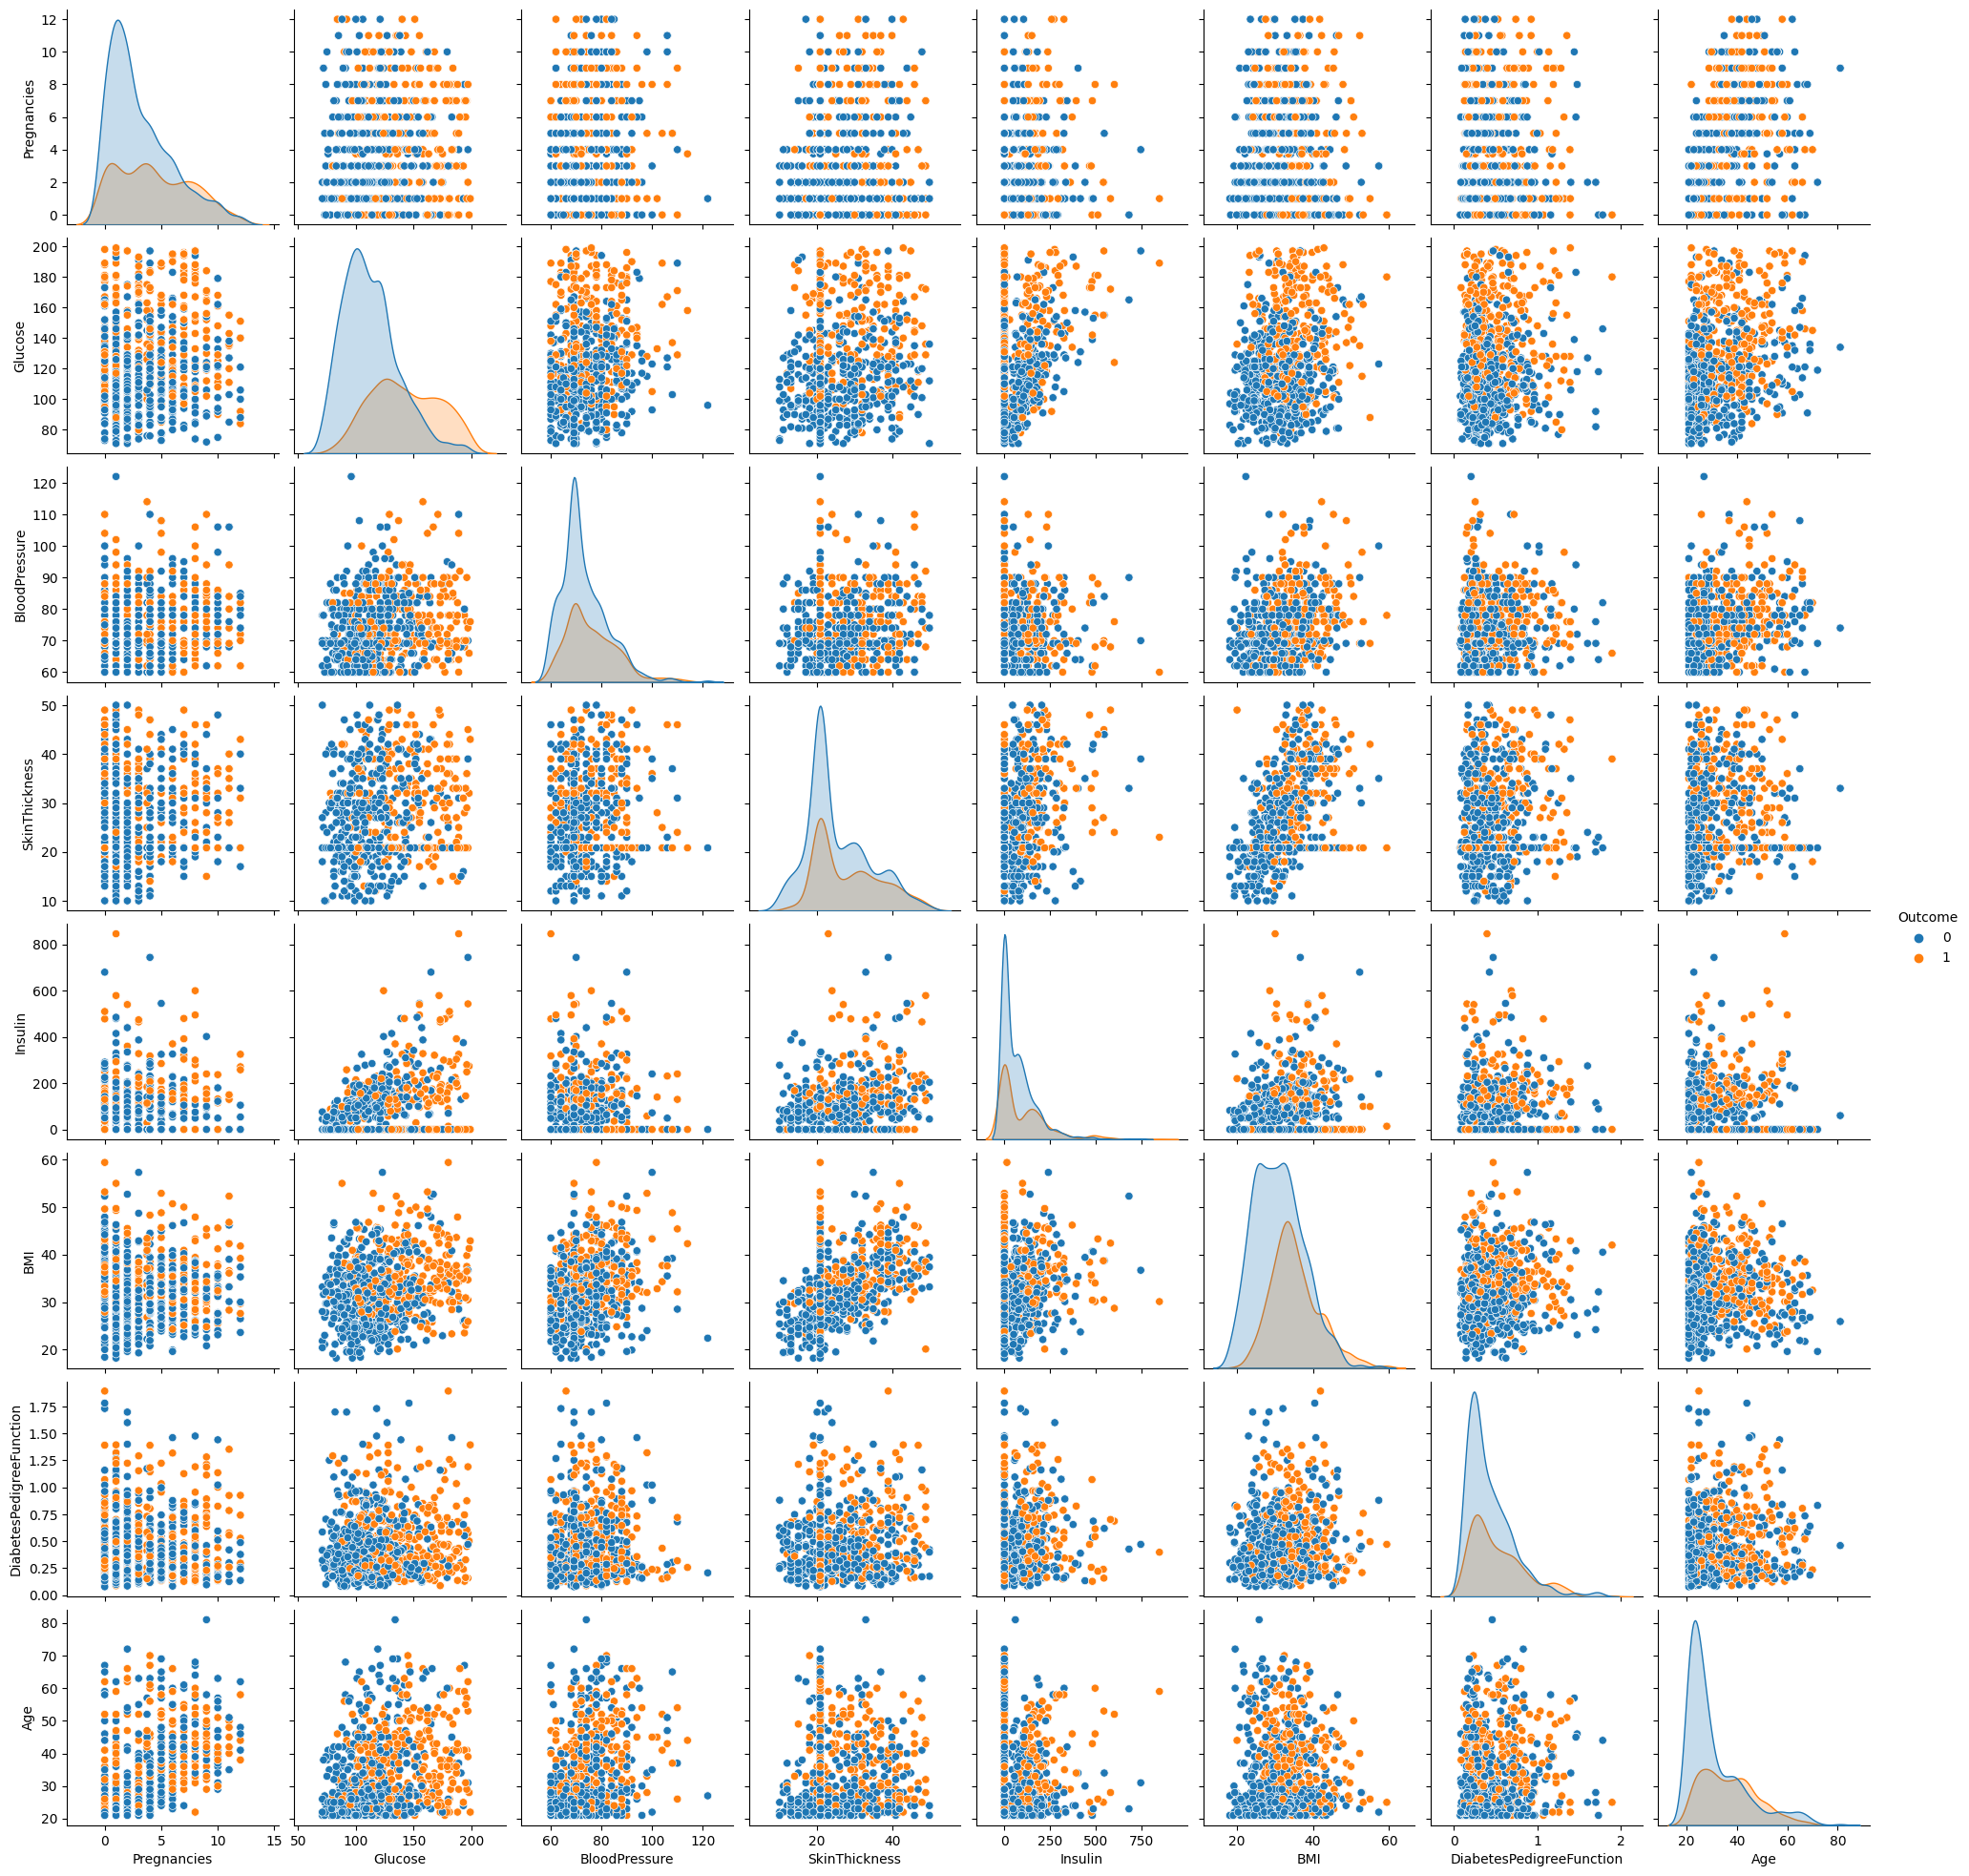

In [20]:
sns.pairplot(df, hue = "Outcome")

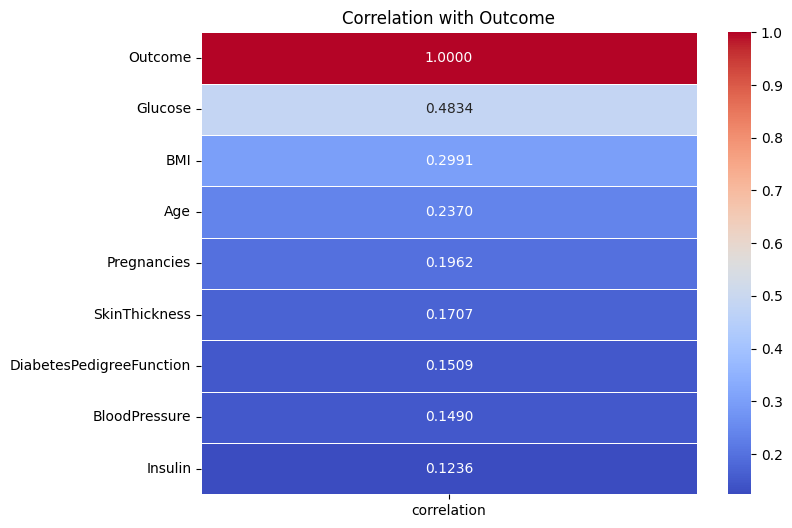

In [21]:
# Checking corrlation between data columns
correlation_with_outcome = df.corrwith(df['Outcome']).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_with_outcome, columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)

plt.title('Correlation with Outcome')
plt.show()

<Axes: >

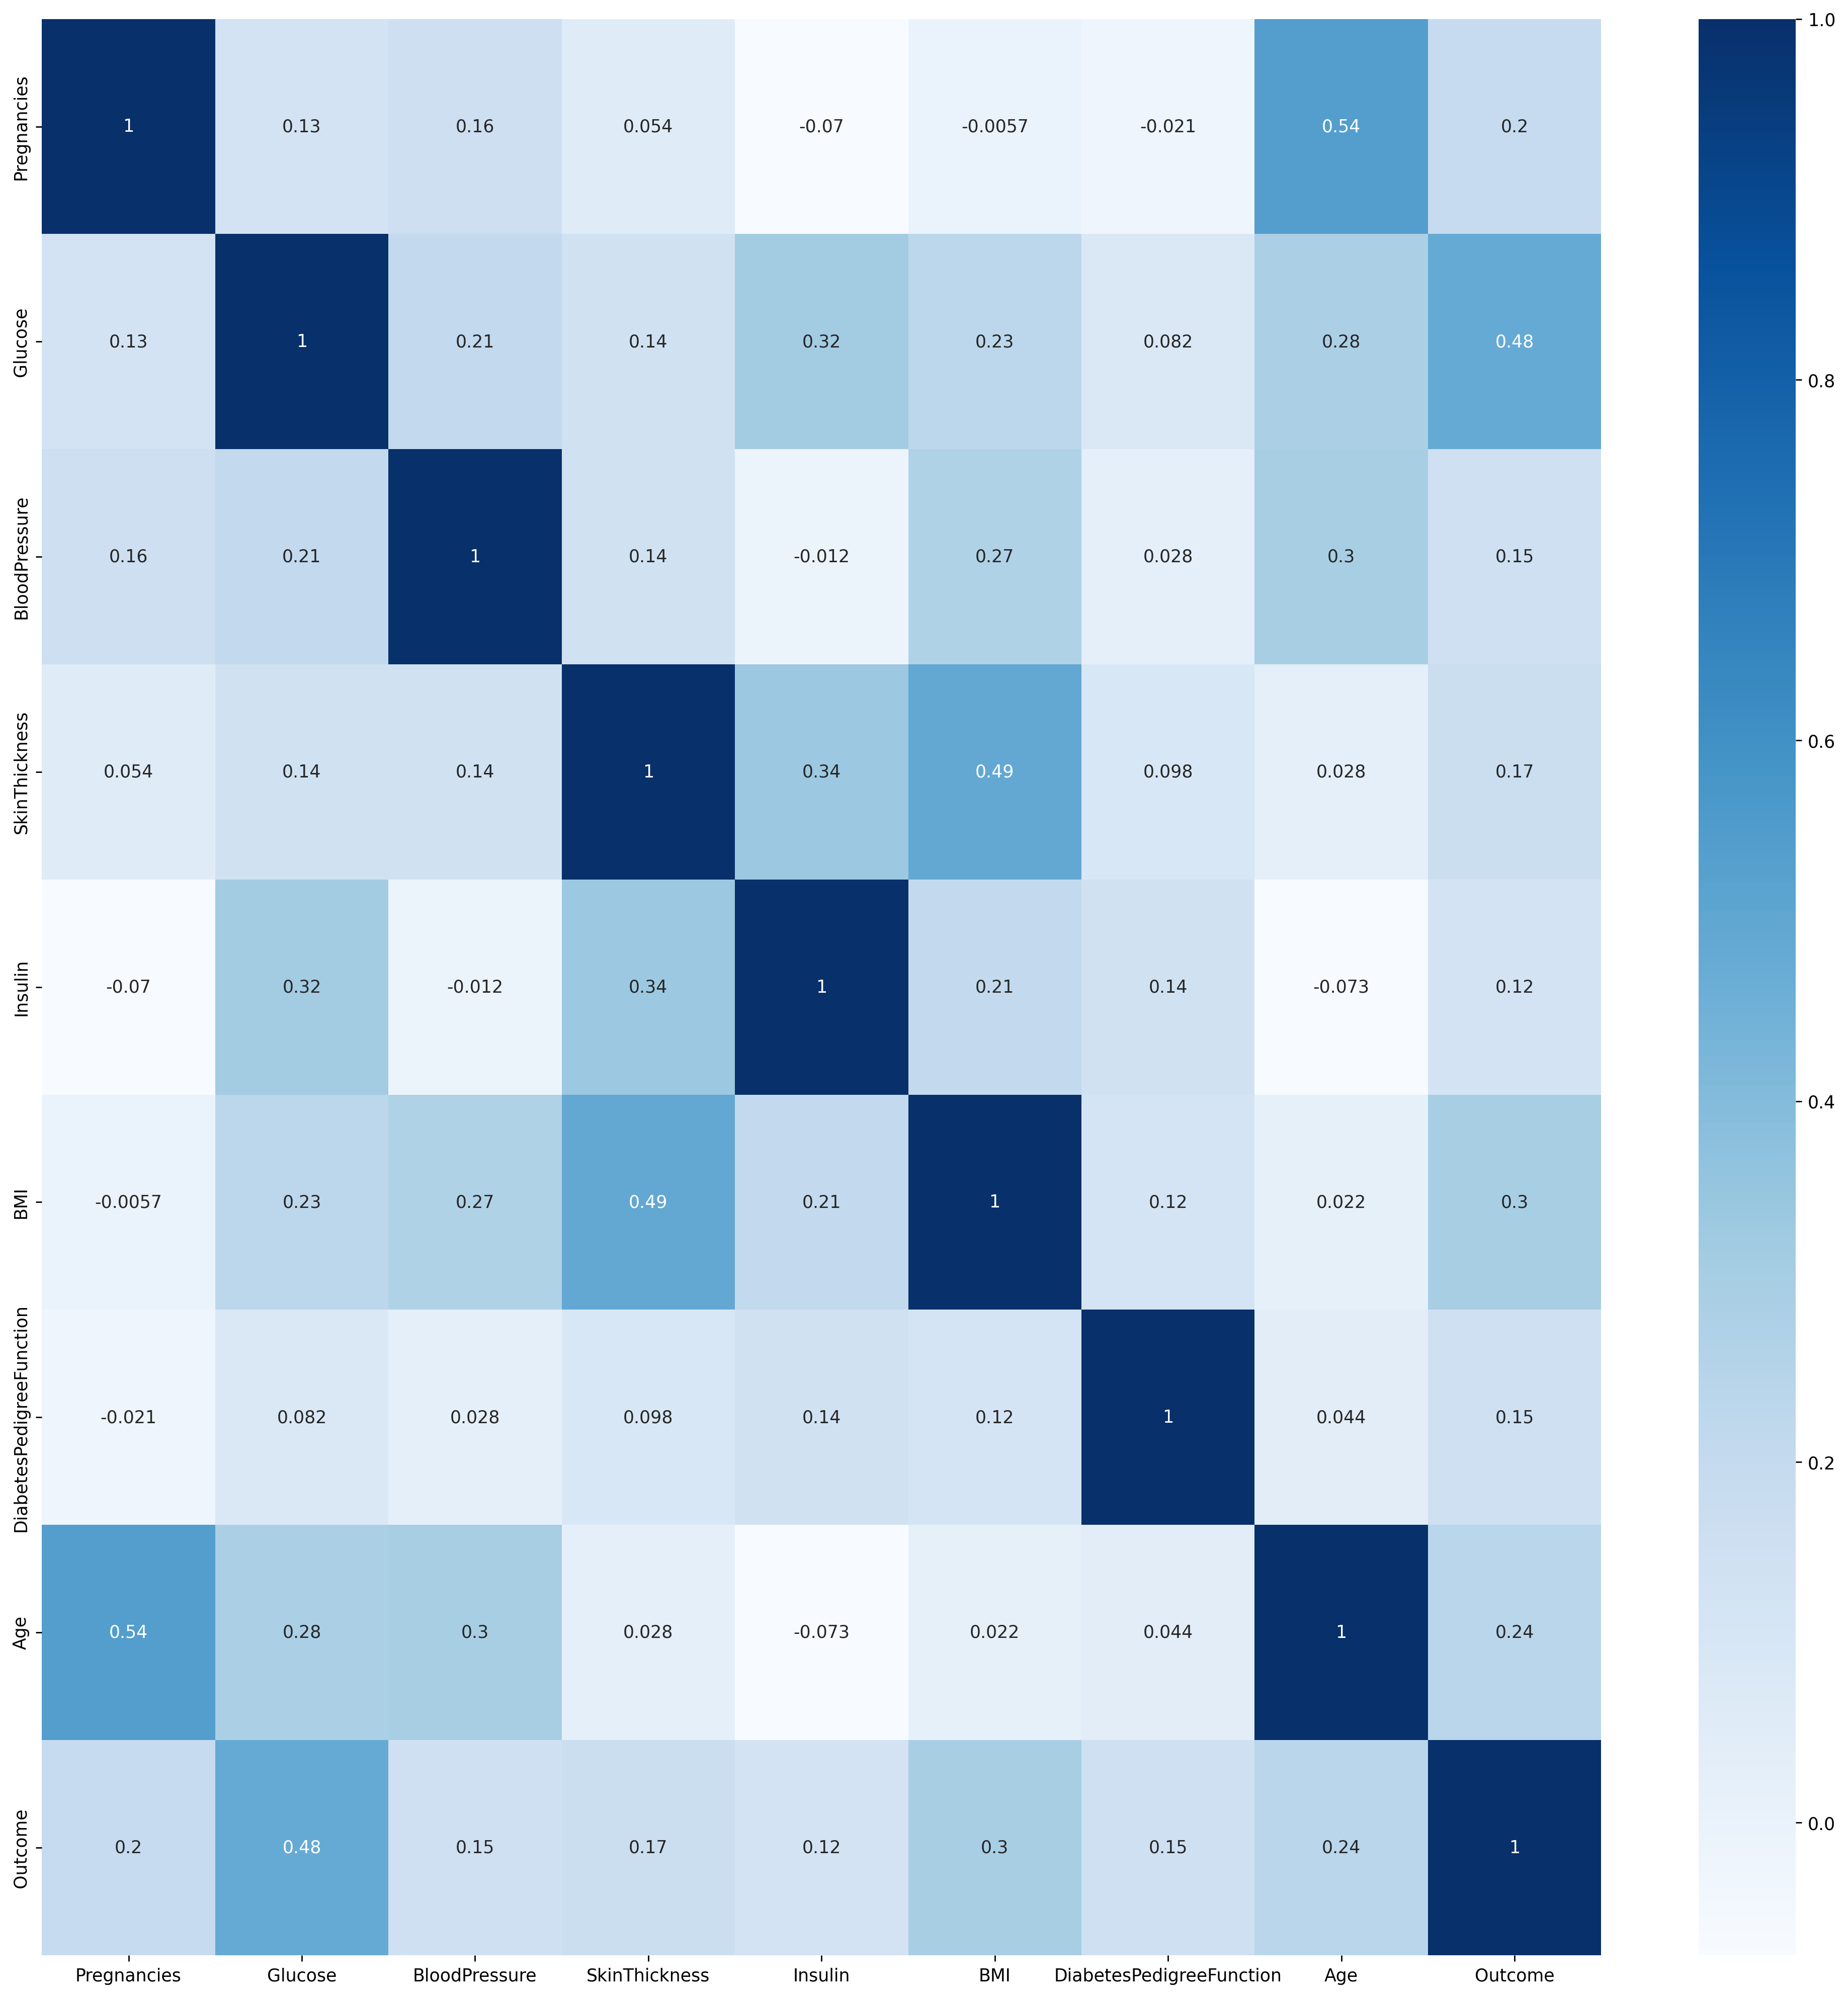

In [22]:
fig = plt.figure(figsize=(20,20), dpi=250)
sns.heatmap(df.corr(), cmap="Blues", annot=True)

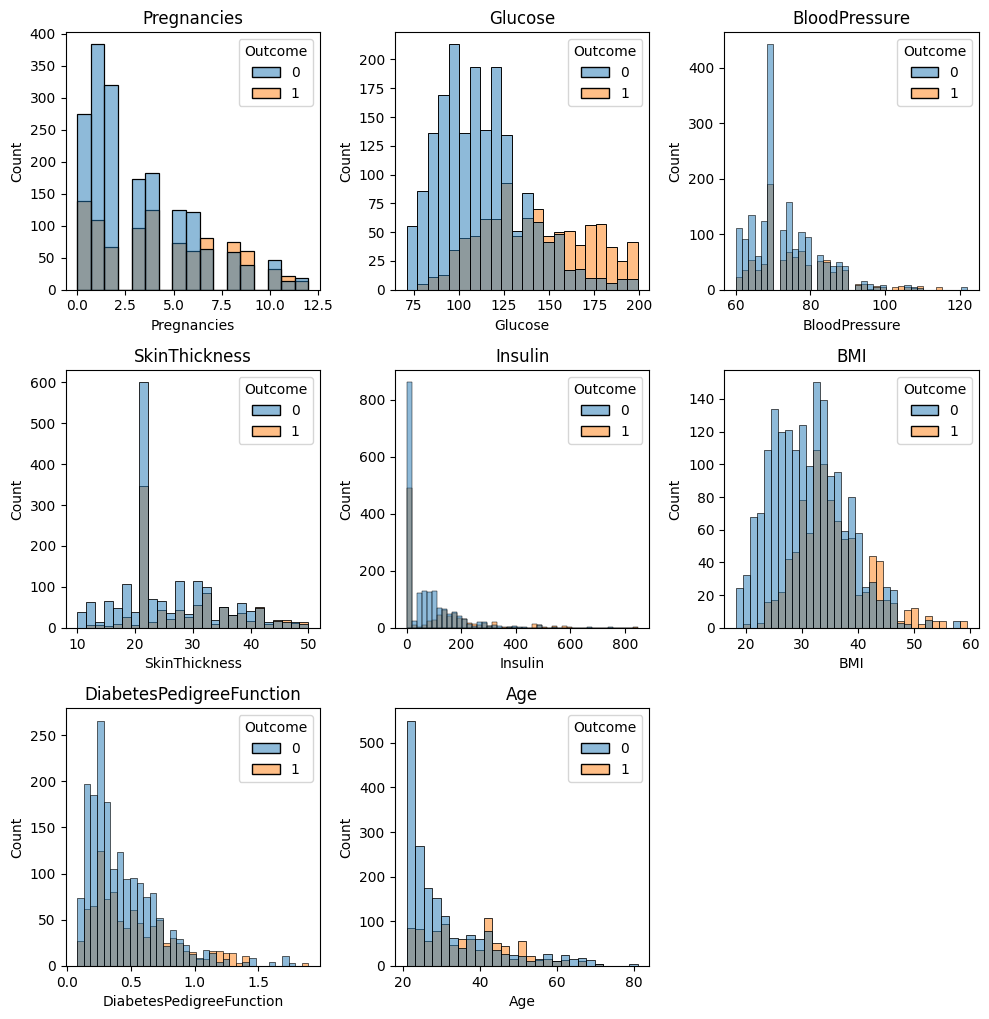

In [23]:
num_list=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='Outcome')

plt.tight_layout()

# Removing Outliear

In [24]:
"""num_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness'
           ,'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
no_outlier = df
for i in num_col:
    lower_limit = df[i].quantile(0.5)
    upper_limit = df[i].quantile(0.95)
    no_outlier[i] = no_outlier[i].clip(lower_limit, upper_limit)
df.plot(kind = "box" , subplots = True , figsize = (15,15) , layout = (5,5))"""

'num_col = [\'Pregnancies\',\'Glucose\',\'BloodPressure\',\'SkinThickness\'\n           ,\'Insulin\', \'BMI\', \'DiabetesPedigreeFunction\', \'Age\', \'Outcome\']\nno_outlier = df\nfor i in num_col:\n    lower_limit = df[i].quantile(0.5)\n    upper_limit = df[i].quantile(0.95)\n    no_outlier[i] = no_outlier[i].clip(lower_limit, upper_limit)\ndf.plot(kind = "box" , subplots = True , figsize = (15,15) , layout = (5,5))'

In [25]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=17)

# Classification Models and Decision Tree Implementation

# Decision Tree

In [27]:
DT_model = DecisionTreeClassifier(random_state=20)
DT_model.fit(X_train , y_train)


DecisionTreeClassifier(random_state=20)

In [28]:
DT_model.score(X_test , y_test)

0.98676293622142

In [29]:
DT_model.score(X_train , y_train)

1.0

In [30]:
DT_pred=DT_model.predict(X_test)
DT_acc = accuracy_score(y_test ,DT_pred )

In [31]:
print(classification_report(y_test , DT_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       539
           1       0.97      0.99      0.98       292

    accuracy                           0.99       831
   macro avg       0.98      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



Text(95.72222222222221, 0.5, 'Truh')

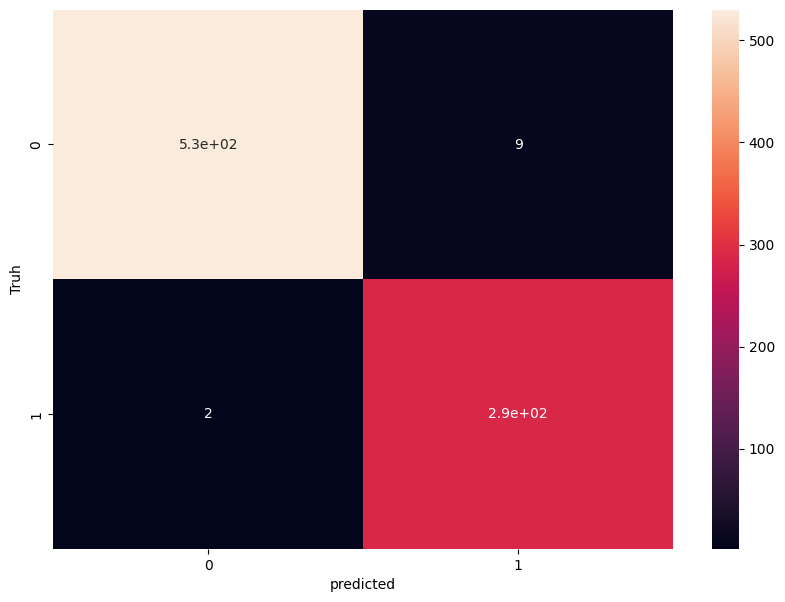

In [32]:
cm2 = confusion_matrix(y_test,DT_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')


In [33]:
print(confusion_matrix(y_test,DT_pred))

[[530   9]
 [  2 290]]


In [34]:
!pip install pydot
!pip install graphviz

In [35]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

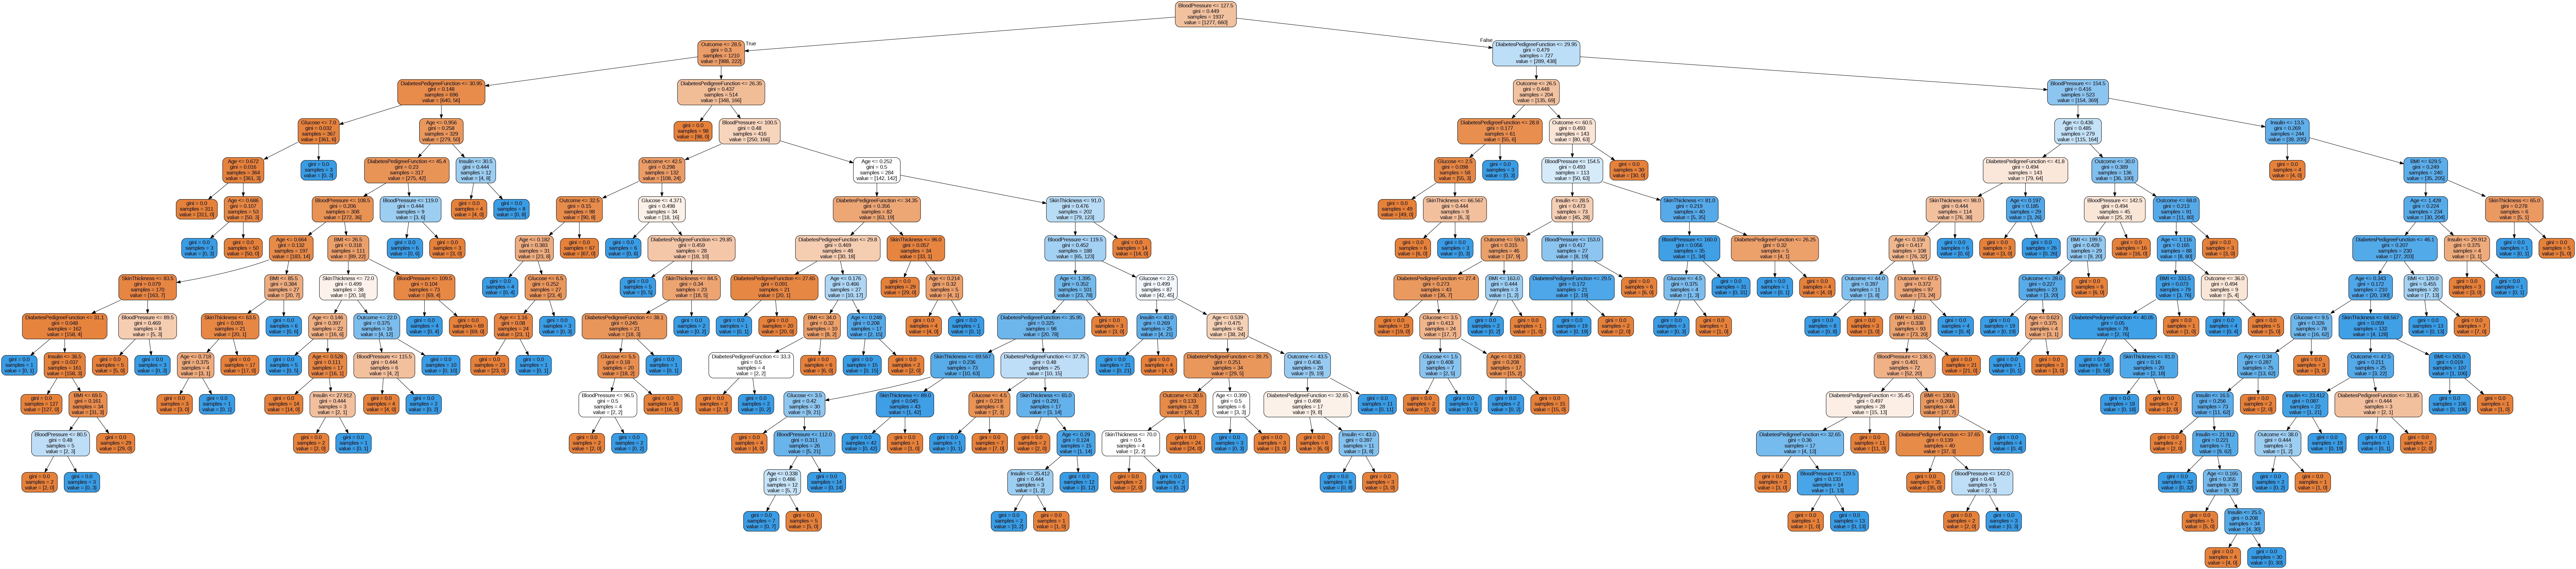

In [36]:
dot_data = StringIO()
export_graphviz(DT_model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# SVM

In [37]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [38]:
svc.score(X_train , y_train)

0.7687145069695406

In [39]:
svc.score(X_test,y_test)

0.7581227436823105

In [40]:
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test , svc_pred)

In [41]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       539
           1       0.73      0.50      0.59       292

    accuracy                           0.76       831
   macro avg       0.75      0.70      0.71       831
weighted avg       0.75      0.76      0.75       831



Text(95.72222222222221, 0.5, 'Truh')

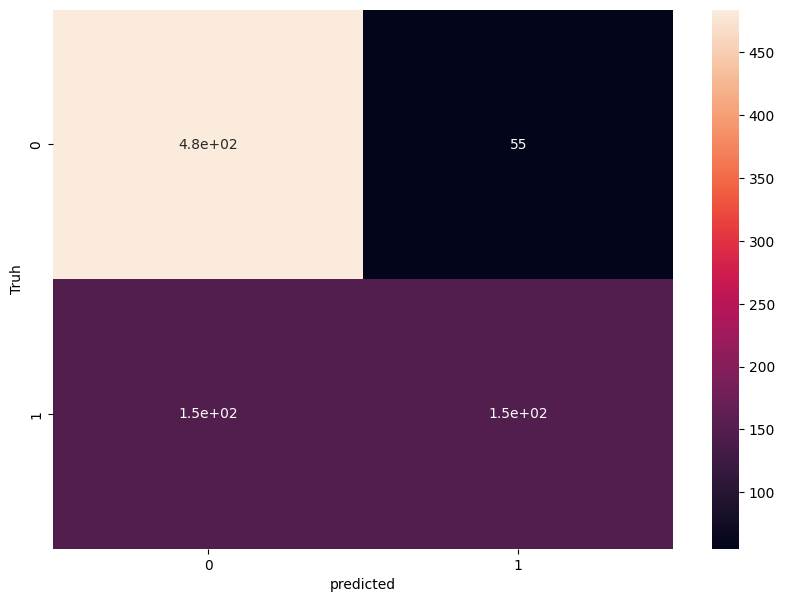

In [42]:
cm2 = confusion_matrix(y_test,svc_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

# Random Forest

In [43]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [44]:
RF_model.score(X_train , y_train)

1.0

In [45]:
RF_model.score(X_test , y_test)

0.9927797833935018

In [46]:
RF_pred = RF_model.predict(X_test)
RF_acc=accuracy_score(y_test , RF_pred)
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.98      1.00      0.99       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



Text(95.72222222222221, 0.5, 'Truh')

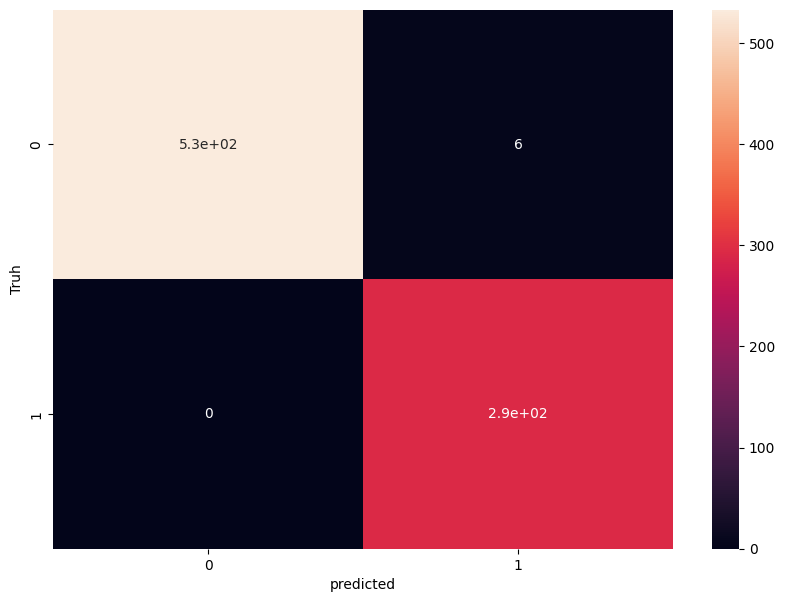

In [47]:
cm3 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

# Model scores

In [48]:
models=pd.DataFrame({
    'models':['Decsion_Tree','SVC','Random_Forest'],
    'scores':[DT_acc,svc_acc,RF_acc]})
models.sort_values(by='scores',ascending=False)

models    scores
2  Random_Forest  0.992780
0   Decsion_Tree  0.986763
1            SVC  0.758123